In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from pandas.plotting import register_matplotlib_converters
plt.rcParams['figure.figsize'] = [12, 5]
register_matplotlib_converters()


from src.ireland_c19_data import get_daily_c19_ireland_data, get_gov_c19_ireland_dataset
from src.c19_plotting import C19Plot

df = get_daily_c19_ireland_data()
df_hspc = get_gov_c19_ireland_dataset()

c19plot = C19Plot(df, df_hspc)
df

,date,c19_icu_cases,available_icu_beds,c19_ventilated_cases,c19_icu_cases_rm,c19_ventilated_cases_rm,available_icu_beds_rm
18,2020-05-01,99,134,67,102.333333,69.666667,140.333333
19,2020-05-02,98,131,67,100.666667,69.000000,137.000000
20,2020-05-03,93,143,60,96.666667,64.666667,136.000000
21,2020-05-04,91,132,56,94.000000,61.000000,135.333333
22,2020-05-05,90,145,53,91.333333,56.333333,140.000000
23,2020-05-06,82,144,52,87.666667,53.666667,140.333333
24,2020-05-07,76,154,50,82.666667,51.666667,147.666667
25,2020-05-08,72,146,52,76.666667,51.333333,148.000000
26,2020-05-09,72,161,51,73.333333,51.000000,153.666667
27,2020-05-10,72,156,50,72.000000,51.000000,154.333333


In [26]:
df_hspc.tail()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,ConfirmedCovidRecovered,TotalCovidRecovered,StatisticsProfileDate,...,RequiringICUCovidCases_new,RequiringICUCovidCases_new_rm,HospitalisedAged5_new_rm,HospitalisedAged5to14_new_rm,HospitalisedAged15to24_new_rm,HospitalisedAged25to34_new_rm,HospitalisedAged35to44_new_rm,HospitalisedAged45to54_new_rm,HospitalisedAged55to64_new_rm,HospitalisedAged65up_new_rm
95,-856335.869598,7.036492e+06,2020-06-05 00:00:00+00:00,28,25163,7,1670,21929,21929,2020/06/03 00:00:00+00,...,0.0,0.666667,0.333333,0.333333,0.333333,0.000000,1.000000,0.000000,2.000000,3.333333
96,-856335.869598,7.036492e+06,2020-06-06 00:00:00+00:00,24,25183,9,1678,21929,21929,2020/06/04 00:00:00+00,...,0.0,0.333333,0.333333,0.333333,0.333333,0.333333,0.666667,0.000000,2.000000,3.333333
97,-856335.869598,7.036492e+06,2020-06-07 00:00:00+00:00,25,25201,1,1679,21929,21929,2020/06/05 00:00:00+00,...,0.0,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,1.000000,2.000000
98,-856335.869598,7.036492e+06,2020-06-08 00:00:00+00:00,9,25207,4,1683,21929,21929,2020/06/06 00:00:00+00,...,2.0,0.666667,0.000000,0.333333,0.000000,0.333333,0.333333,0.333333,1.000000,2.000000
99,-856335.869598,7.036492e+06,2020-06-09 00:00:00+00:00,9,25215,9,1691,21929,21929,2020/06/07 00:00:00+00,...,2.0,1.333333,0.000000,0.333333,0.000000,0.666667,1.000000,0.666667,0.333333,2.666667


In [27]:
# don't need this anymore
#c19plot.daily_death_vs_icu()

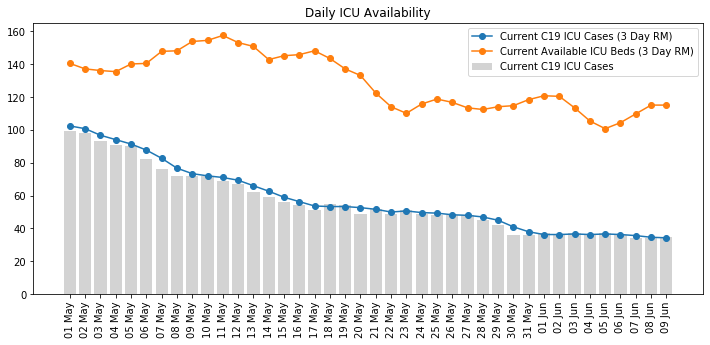

In [28]:
c19plot.daily_icu_availability()

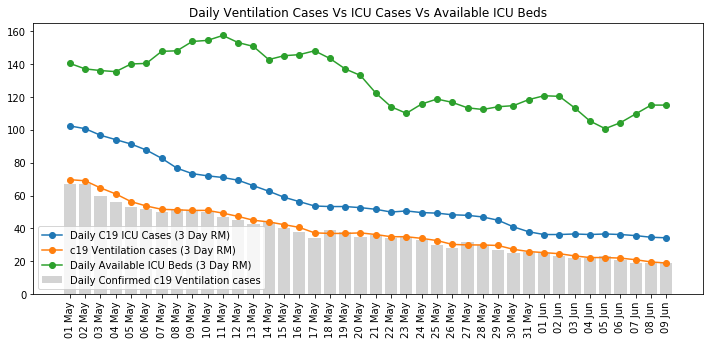

In [29]:
c19plot.daily_icu_vs_ventilation()

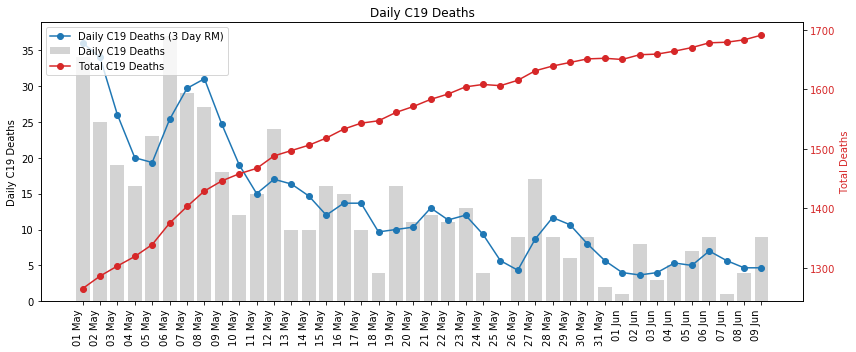

In [30]:
c19plot.hspc_daily_deaths()

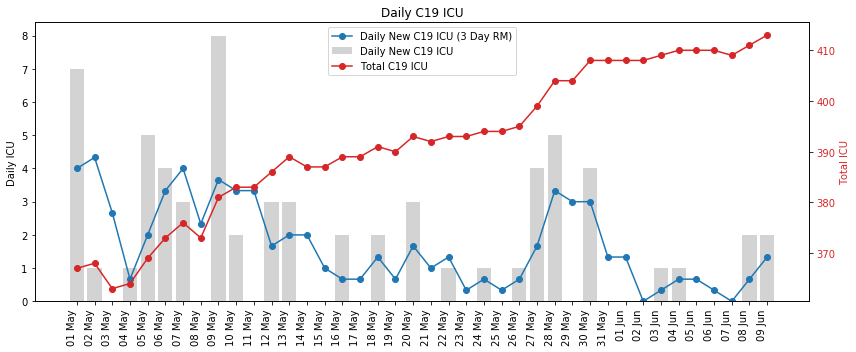

In [31]:
c19plot.hspc_icu()

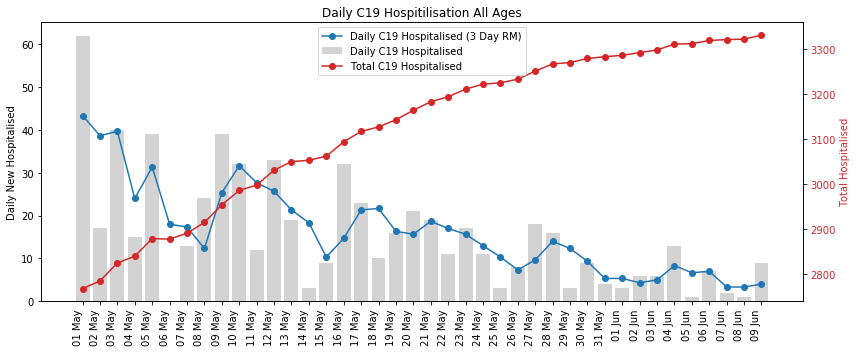

In [32]:
c19plot.hspc_hospitilisation()

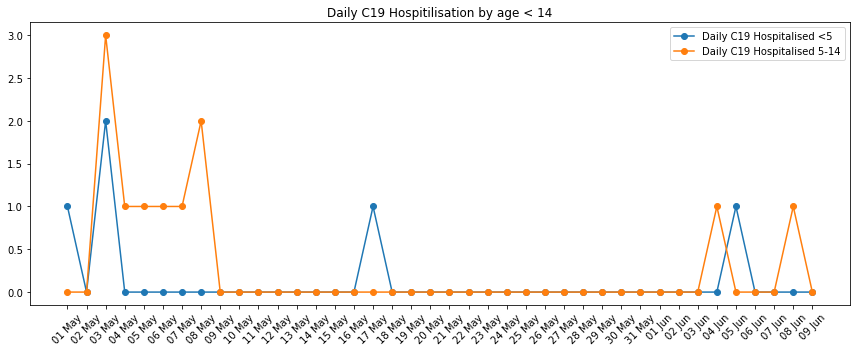

In [33]:
c19plot.hspc_hospitilisation_less_14()

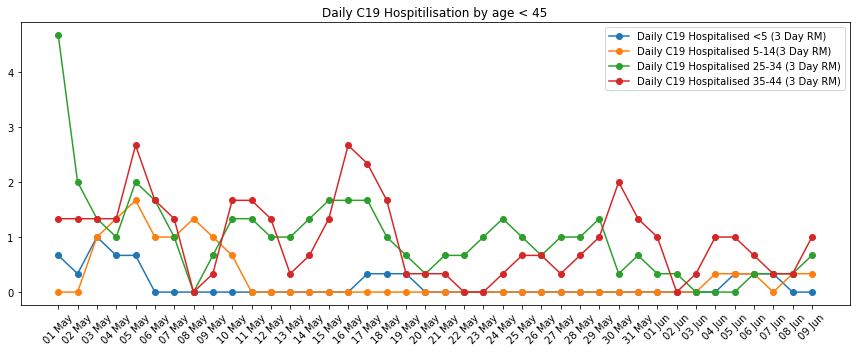

In [34]:
c19plot.hspc_hospitilisation_less_45()

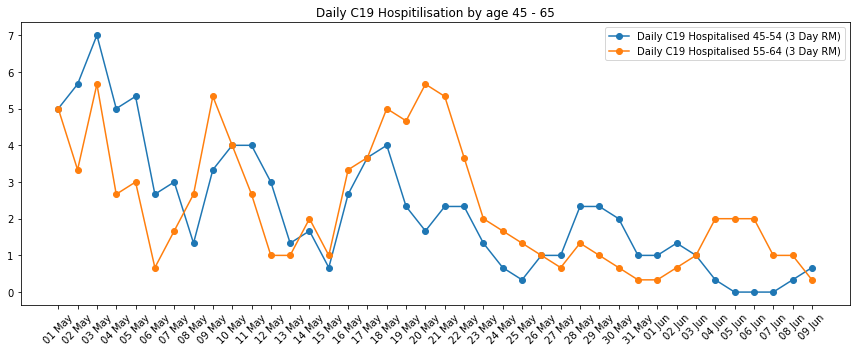

In [35]:
c19plot.hspc_hospitilisation_45_to_65()

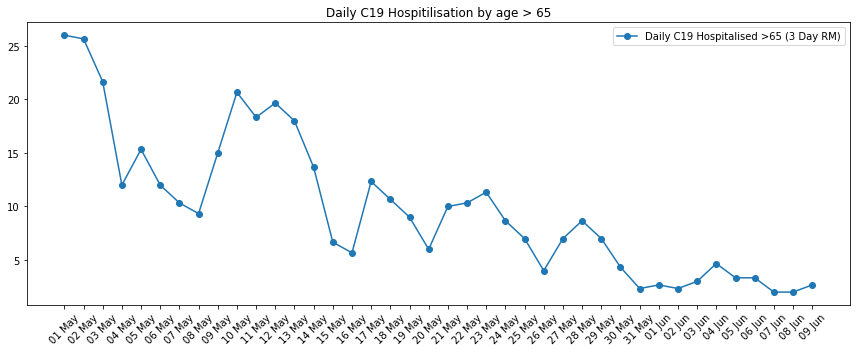

In [36]:
c19plot.hspc_hospitilisation_greater_65()